<a href="https://colab.research.google.com/github/siennahan123/ITAndBusinessInovation/blob/main/%EC%95%84%EB%B9%84%ED%98%81_%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#셋업

In [2]:
#그림 그릴 수 있는 라이브러리
!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#구글연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

##seaborn 폰트 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv !rm ~/.cache/matplotlib -rf
#런타임 다시시작
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/content/!rm: skipping, no such directory
/root/.cache/matplotlib: caching, new cache contents: 0 fonts, 1 dirs
/root/.cache/matplotlib/tex.cache: caching, new cache contents: 0 fonts, 0 dirs
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


#데이터 가공

###데이터 가져오기

In [5]:
# csv 데이터 가져오기, id를 인덱스로 지정
health_data = "/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv"
health_df = pd.read_csv(health_data, index_col='가입자일련번호')
print(type(health_df))
display(health_df)


<class 'pandas.core.frame.DataFrame'>


,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2020,44,F,13,155,55,83.0,1.2,1.2,1,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9997,2020,43,F,11,160,55,77.5,1.0,1.2,1,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9998,2020,45,M,12,160,80,93.0,0.6,0.6,1,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021


###전처리 및 탐색

In [6]:
#흡연상태, 음주여부는 No, NotNow, Yes를 각각 0, 1, 2로 변환
health_df['흡연상태'] = health_df['흡연상태'].astype(str)
health_df['음주여부'] = health_df['음주여부'].astype(str)

def strToNo(data):
  data
  if data == "No":
    data = 0
    return data
  elif data == "NotNow":
    data = 1
    return data
  else:
    data = 2
    return data

health_df["흡연상태"] = health_df["흡연상태"].apply(strToNo)
health_df["음주여부"] = health_df["음주여부"].apply(strToNo)


In [7]:
display(health_df)

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,0,0,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,0,0,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,0,0,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,0,0,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,0,0,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2020,44,F,13,155,55,83.0,1.2,1.2,1,...,0.7,20.0,21.0,20.0,0,2,0,NaN,NaN,12/29/2021
9997,2020,43,F,11,160,55,77.5,1.0,1.2,1,...,0.7,24.0,22.0,21.0,0,2,1,0.0,0.0,12/29/2021
9998,2020,45,M,12,160,80,93.0,0.6,0.6,1,...,1.0,22.0,27.0,35.0,0,0,0,NaN,NaN,12/29/2021


In [8]:
delete_no_data = health_df.dropna(subset = ["식전혈당(공복혈당)"], axis = 0) #공복혈당 결측치 제거
delete_no_data = delete_no_data.dropna(subset = ["감마지티피"], axis = 0) #감마지티피 결측치 제거
f_data = delete_no_data[delete_no_data.성별코드 != 'M'] #공복혈당/감마지티피 결측치를 제거한 데이터에서 여성만을 따로 지정
m_data = delete_no_data[delete_no_data.성별코드 != 'F'] #공복혈당/감마지티피 결측치를 제거한 데이터에서 남성만을 따로 지정

In [9]:
display(m_data)

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,0,0,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,0,0,1,0.0,0.0,12/29/2021
6,2020,27,M,9,185,85,94.0,1.2,1.2,1,...,1.1,25.0,32.0,26.0,2,2,0,NaN,NaN,12/29/2021
7,2020,44,M,9,165,80,93.0,0.8,0.7,1,...,0.7,18.0,20.0,35.0,2,2,1,0.0,1.0,12/29/2021
8,2020,41,M,13,160,65,92.0,0.5,0.5,1,...,1.2,18.0,17.0,19.0,2,0,1,0.0,2.0,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,2020,11,M,16,155,45,70.0,0.1,0.7,1,...,1.4,20.0,13.0,16.0,0,0,0,NaN,NaN,12/29/2021
9993,2020,26,M,15,170,70,88.0,0.7,0.8,2,...,1.2,23.0,17.0,36.0,0,2,0,NaN,NaN,12/29/2021
9994,2020,30,M,12,165,55,81.7,1.0,0.7,1,...,0.7,25.0,30.0,72.0,0,2,0,NaN,NaN,12/29/2021


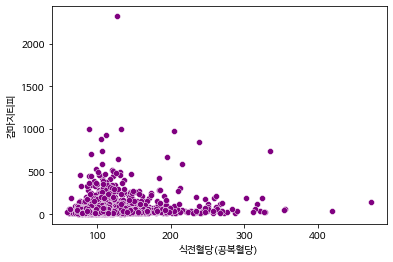

In [10]:
sns.scatterplot(data = m_data, x = "식전혈당(공복혈당)", y = "감마지티피", c=['purple'])

In [11]:
#남자 정상 감마지티피: 10 ~ 71, 감마지티피가 높으면 간손상 의심
def m_normal_gamma(data):
  data
  if data > 71 :
    data = "간손상"
    return data
  else:
    data = "정상"
    return data

m_data['감마지티피'] = m_data['감마지티피'].apply(m_normal_gamma)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


#의사결정나무

###학습 및 분할

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = m_data[['식전혈당(공복혈당)', '흡연상태',	'음주여부']]
##식전 저혈당, 음주여부, 흡연상태와 간손상(높은 감마지티피) 관계성
##여성의 경우 음주와 흡연이 남성만큼 두드러지지 않았기에 제외함
Y = m_data['감마지티피']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

tree_ = DecisionTreeClassifier(random_state=0)  
tree_.fit(X_train, Y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree_.score(X_train, Y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree_.score(X_test, Y_test)))

X_train

학습용 데이터 정확도: 0.868
시험용 데이터 정확도: 0.793


,식전혈당(공복혈당),흡연상태,음주여부
가입자일련번호,,,
9854,108.0,1,2
4982,90.0,2,0
7745,99.0,0,2
2311,103.0,2,2
4129,91.0,1,0
...,...,...,...
8667,105.0,2,2
982,88.0,2,2
6098,104.0,1,0


###의사결정나무 모델 구축 및 예측

In [13]:
tree1 = DecisionTreeClassifier(max_depth = 7, random_state=0) #max_depth가 7일 때
tree1 = tree1.fit(X_train, Y_train)

tree2 = DecisionTreeClassifier(max_depth = 5, random_state=0) #max_depth가 5일 때
tree2 = tree2.fit(X_train, Y_train)

tree3 = DecisionTreeClassifier(random_state=0) #max_depth가 none일 때
tree3 = tree3.fit(X_train, Y_train)


In [14]:
tree1.score(X_test, Y_test) #MaxDepth = 7일 때

0.8126959247648903

In [15]:
tree2.score(X_test, Y_test) #MaxDepth = 5일 때

0.8150470219435737

In [16]:
tree3.score(X_test, Y_test) #MaxDepth = none일 때

0.7931034482758621

In [17]:
###K번 수행한 교차 검증 결과의 평균값

from sklearn.model_selection import cross_val_score
import numpy as np

dt_scores1 = cross_val_score(tree1, X_train, Y_train, cv=10, scoring = 'accuracy')
dt_scores2 = cross_val_score(tree2, X_train, Y_train, cv=10, scoring = 'accuracy')
dt_scores3 = cross_val_score(tree3, X_train, Y_train, cv=10, scoring = 'accuracy')

print("Accuracy")
print("Decision tree1: ", np.round(dt_scores1, 3)) ##소수점 3자리수에서 반올림
print("Decision tree2: ", np.round(dt_scores2, 3))
print("Decision tree3: ", np.round(dt_scores3, 3))

print("Accuracy mean")
print("Decision tree {:.3f}".format(dt_scores1.mean()))
print("Decision tree {:.3f}".format(dt_scores2.mean()))
print("Decision tree {:.3f}".format(dt_scores3.mean()))

Accuracy
Decision tree1:  [0.833 0.838 0.849 0.83  0.846 0.843 0.838 0.828 0.84  0.84 ]
Decision tree2:  [0.841 0.846 0.851 0.836 0.846 0.843 0.841 0.846 0.848 0.843]
Decision tree3:  [0.822 0.846 0.833 0.828 0.843 0.83  0.815 0.817 0.851 0.838]
Accuracy mean
Decision tree 0.839
Decision tree 0.844
Decision tree 0.832


In [18]:
print("학습용 데이터 정확도: {:.3f}".format(tree3.score(X_train, Y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree3.score(X_test, Y_test)))

학습용 데이터 정확도: 0.868
시험용 데이터 정확도: 0.793


In [19]:
result = tree3.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.78426673 0.1146407  0.10109256]


In [42]:
n = m_data[['식전혈당(공복혈당)']] ##식전 저혈당과 간손상(높은 감마지티피) 관계성
m = m_data['감마지티피']
n_train, n_test, m_train, m_test = train_test_split(n, m, test_size = 0.25, random_state=42)

tree4 = DecisionTreeClassifier(random_state=0)  
tree4.fit(n_train, m_train)
print("학습용 데이터 정확도: {:.3f}".format(tree4.score(n_train, m_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree4.score(n_test, m_test)))

학습용 데이터 정확도: 0.854
시험용 데이터 정확도: 0.816


In [43]:
N = m_data[['흡연상태',	'음주여부']] ## 음주여부, 흡연상태와 간손상(높은 감마지티피) 관계성
M = m_data['감마지티피']
N_train, N_test, M_train, M_test = train_test_split(N, M, test_size = 0.25, random_state=42)

tree5 = DecisionTreeClassifier(random_state=0)  
tree5.fit(N_train, M_train)
print("학습용 데이터 정확도: {:.3f}".format(tree5.score(N_train, M_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree5.score(N_test, M_test)))

학습용 데이터 정확도: 0.848
시험용 데이터 정확도: 0.823


###시각화

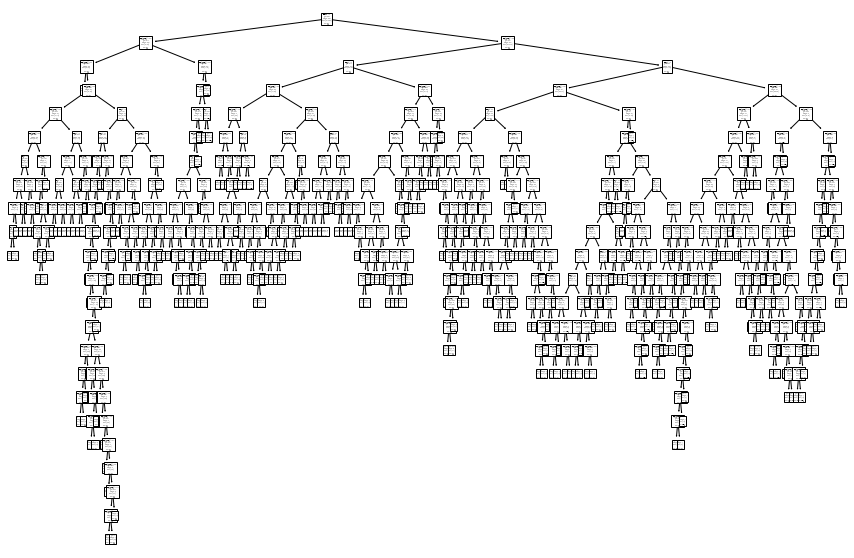

In [44]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10), facecolor='white')
plot_tree(tree3, 
          feature_names=X.columns, ## 박스에 변수 이름 표시
          class_names=["간손상", "정상"] ## 클래스 이름(범주 이름)
         )
plt.show()

###정오분류표

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(Y_test.value_counts())
print(m_test.value_counts())
print(M_test.value_counts())

pred1 = tree1.predict(X_test)
pred2 = tree2.predict(X_test)
pred3 = tree3.predict(X_test)
pred4 = tree4.predict(n_test)
pred5 = tree5.predict(N_test)

# 예측 결과인 pred와 실제 결과인 Y_test의 Confusion Matrix 출력
print('tree1 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(Y_test, pred1)))
print(confusion_matrix(Y_test, pred1))
print('tree2 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(Y_test, pred2)))
print(confusion_matrix(Y_test, pred2))
print('tree3 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(Y_test, pred3)))
print(confusion_matrix(Y_test, pred3))
print('tree4 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(m_test, pred4)))
print(confusion_matrix(m_test, pred4))
print('tree5 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(M_test, pred5)))
print(confusion_matrix(M_test, pred5))

정상     1050
간손상     226
Name: 감마지티피, dtype: int64
정상     1050
간손상     226
Name: 감마지티피, dtype: int64
정상     1050
간손상     226
Name: 감마지티피, dtype: int64
tree1 시험용 데이터 세트 정확도:0.813
[[  10  216]
 [  23 1027]]
tree2 시험용 데이터 세트 정확도:0.815
[[   8  218]
 [  18 1032]]
tree3 시험용 데이터 세트 정확도:0.793
[[ 21 205]
 [ 59 991]]
tree4 시험용 데이터 세트 정확도:0.816
[[  10  216]
 [  19 1031]]
tree5 시험용 데이터 세트 정확도:0.823
[[   0  226]
 [   0 1050]]


###평가

In [ ]:
## tree1~3 (max depth를 다르게 함), 4~5(변수를 수정함)를 분석한 결과
## max dapth를 none으로 설정했던 tree 3에서 정확도는 가장 낮았지만,
## 간손상 위험이 있는 사람을 '간손상' 카테고리로 분류할 확률 (재현율)이 가장 높았다.
## 질병 예측에 관한 한 정확도보다 재현율이 더 중요하므로, tree3이 더 적합한 모델이라고 할 수 있다.
## tree3의 재현율은 positive(양성)을 '간손상' 카테고리로 계산했을 때  21/59+21=0.3625,  약 36%이다.

#인사이트

In [45]:
## 간이 손상되면 혈당 조절이 잘 안 되어 공복 혈당은 무척 낮고 식후 혈당은 높다는 정보를 가지고
## 해당 데이터셋에 있는 혈당과 간에 영향을 미치는 음주, 흡연을 독립 변수로,
## 간손상을 평가하는 지표가 되는 '감마지피티'를 종속 변수로 잡았다.
## 처음 가설은 음주와 흡연이 간에 지대한 영향을 미치므로 해당 조건을 변수로 잡은 tree5번이 더 좋을 것이라고 생각했는데
## 간손상을 '일으킬지도 모르는' 음주와 흡연 여부보다,
## 간손상이 이미 일어난 이후의 증상에 가까운 '공복 저혈당 증상'이 더 명백하게 감마지피티 수치를 잡았다는 것이
## (19번 코드: 변수 중요성) 
## 흥미로우면서도 생각해보니 당연했다.
## 음주와 흡연 여부만으로 미래의 간이 어떻게 될지는 모르지만, 적어도 혈당을 주기적으로 검사하는 것이
## 우리가 평소 생각하는 당뇨 예방 뿐만 아니라 간 손상도 빨리 발견할 수 있다는 것을 알 수 있었다.